In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import warnings

warnings.filterwarnings('ignore')

# Any results you write to the current directory are saved as output.

In [2]:
df = pd.read_csv("train.csv")
df1 = pd.read_csv("test.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
df

In [ ]:
def convert_to_lakhs(value):
    value = str(value)  # Convert value to string
    if value == "0":  # Handle cases where value is '0'
        return 0
    elif 'Crore+' in value:
        number, unit = value.split()
        number = float(number.replace(",", ""))  # Remove comma from numbers
        return int(number * 100)  # Convert Crore+ to Lakhs
    elif 'Lac+' in value:
        number, unit = value.split()
        number = float(number.replace(",", ""))  # Remove comma from numbers
        return int(number)  # Return the number as it is
    elif 'Thou+' in value:
        number, unit = value.split()
        number = float(number.replace(",", ""))  # Remove comma from numbers
        return int(number / 100)  # Convert Thou+ to Lakhs
    elif 'Hund+' in value:
        number, unit = value.split()
        number = float(number.replace(",", ""))  # Remove comma from numbers
        return int(number / 1000)  # Convert Thou+ to Lakhs
    else:
        return int(value)  # Return the number as it is

df["Total Assets"] = df["Total Assets"].apply(convert_to_lakhs)
df["Liabilities"] = df["Liabilities"].apply(convert_to_lakhs)
df.drop(columns=['ID'], inplace=True)

df1["Total Assets"] = df1["Total Assets"].apply(convert_to_lakhs)
df1["Liabilities"] = df1["Liabilities"].apply(convert_to_lakhs)
df1.drop(columns=['ID'], inplace=True)

df1

In [ ]:
df

In [ ]:
df.info()

In [ ]:
col_names = ['Candidate','Constituency ∇','Party','Criminal Case','Total Assets','Liabilities','state','Education']

for col in col_names:

    print(df[col].value_counts())

In [ ]:
df.isnull().sum()

In [ ]:
X = df.drop(['Education'], axis=1)

y = df['Education']

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# X_train.shape, X_test.shape

In [ ]:
# X_train.dtypes

In [ ]:
# X_train.columns

In [ ]:
df1

In [ ]:
!pip install category_encoders
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['Candidate', 'Constituency ∇', 'Party','Criminal Case', 'Total Assets', 'Liabilities', 'state'])

X_train = encoder.fit_transform(X)

X_test = encoder.transform(df1)

X_train.head()

In [154]:
X_test.head()

,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,-1.0,-1.0,9,3.0,119.0,44.0,8
1,-1.0,-1.0,4,4.0,5.0,70.0,5
2,-1.0,-1.0,15,6.0,67.0,14.0,8
3,-1.0,-1.0,4,4.0,5.0,2.0,5
4,-1.0,-1.0,6,2.0,80.0,1.0,6


In [155]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier

rfc = RandomForestClassifier(random_state=0)

# fit the model

rfc.fit(X_train, y)



# Predict the Test set results

y_pred = rfc.predict(X_test)


y_pred
# # Check accuracy score

# from sklearn.metrics import accuracy_score

# print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


array(['Graduate', 'Graduate Professional', 'Graduate', ...,
       'Post Graduate', 'Graduate', 'Post Graduate'], dtype=object)

In [156]:
df_pred = pd.DataFrame(y_pred, columns=["Education"])

df_pred.to_csv('submission.csv', index_label='ID')

In [124]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.1971


In [82]:

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [83]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Constituency ∇    0.194412
Candidate         0.192260
Total Assets      0.158101
Liabilities       0.154877
state             0.130520
Party             0.088198
Criminal Case     0.081633
dtype: float64

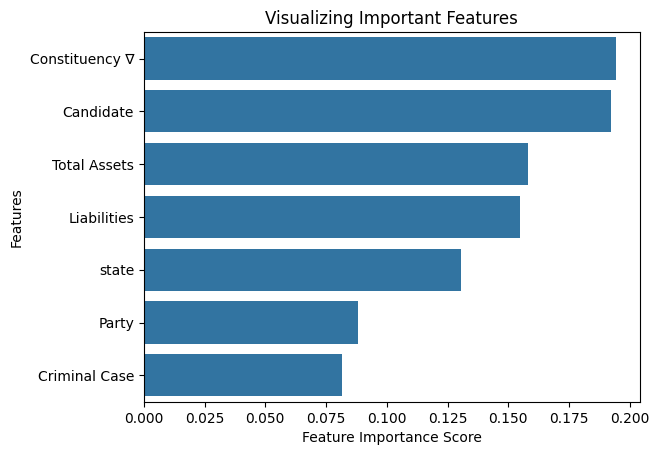

In [84]:
sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [85]:
X = df.drop(['Criminal Case', 'Education'], axis=1)

y = df['Education']

In [89]:
X_test = df1.drop(['Criminal Case'], axis=1)
X_test

,Candidate,Constituency ∇,Party,Total Assets,Liabilities,state
0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,7000,1100,MAHARASHTRA
1,Becharam Manna,SINGUR,AITC,200,13,WEST BENGAL
2,Sunil Vijay Tingre,VADGAON SHERI,NCP,4900,100,MAHARASHTRA
3,Asit Mazumder (Tapan),CHUNCHURA,AITC,200,0,WEST BENGAL
4,Hriday Narayan Singh Patel,SAGRI,SP,1600,200,UTTAR PRADESH
...,...,...,...,...,...,...
1369,Niladri Sekhar Dana,BANKURA,BJP,100,0,WEST BENGAL
1370,Mukesh Kumar Pal,PALLAHARA,BJD,0,13,ODISHA
1371,Vijay Shanker Dubey,MAHARAJGANJ,INC,500,0,BIHAR
1372,Satpal Singh Satti,UNA,BJP,200,5,HIMACHAL PRADESH


In [90]:
from sklearn.model_selection import train_test_split

# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Candidate', 'Constituency ∇', 'Party', 'Total Assets', 'Liabilities', 'state'])


X_train = encoder.fit_transform(X)

X_test = encoder.transform(X_test)

# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score

# print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [93]:
y_pred

array(['Graduate', 'Graduate Professional', 'Graduate', ...,
       'Post Graduate', 'Graduate', 'Post Graduate'], dtype=object)

In [94]:
df_pred = pd.DataFrame(y_pred, columns=["Education"])

In [95]:
df_pred

,Education
0,Graduate
1,Graduate Professional
2,Graduate
3,Post Graduate
4,Graduate
...,...
1369,12th Pass
1370,Graduate
1371,Post Graduate
1372,Graduate


In [97]:
df_pred.to_csv('submission.csv', index_label='ID')